In [9]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('geolocation.csv', 'geolocation'),
    ('order_items.csv', 'order_items'),
    ('orders.csv', 'orders'),
    ('payments.csv', 'payments'),
    ('products.csv', 'products'),
    ('sellers.csv', 'sellers')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='',
    database='test'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/vk185/OneDrive/Desktop/ecommerce project'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing geolocation.csv
NaN values before replacement:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Processing order_items.csv
NaN values before replacement:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered

In [2]:
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

conn = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "",
    database = "test"
)
cursor = conn.cursor()

sql ="SHOW TABLES;"
cursor.execute(sql)
row = cursor.fetchall()
for rows in row:
    print(rows)
conn.commit()

('customers',)
('geolocation',)
('order_items',)
('orders',)
('payments',)
('products',)
('sellers',)


# 1. List all unique cities where customers are located 

In [8]:
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

conn = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "",
    database = "test"
)
cursor = conn.cursor()

sql ="""SELECT DISTINCT customer_city FROM customers;

"""
cursor.execute(sql)
data = cursor.fetchall()
for rows in data:
    print(rows)
conn.commit()

DatabaseError: 2003 (HY000): Can't connect to MySQL server on 'localhost:3306' (10061)

# 2. Count the number of orders placed in 2017.
   

In [4]:
sql ="""SELECT COUNT(order_id) FROM orders WHERE year(order_purchase_timestamp) = 2017;

"""
cursor.execute(sql)
data = cursor.fetchall()
print("total order placed in 2017 is: ",data[0][0])
conn.commit()

total order placed in 2017 is:  45101


# 3. Find the total sales per category.

In [5]:

import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

conn = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "",
    database = "test"
)
cursor = conn.cursor()
sql = """
SELECT upper(products.product_category) category,
round(SUM(payments.payment_value),2) sales
FROM products JOIN order_items
ON products.product_id = order_items.product_id
JOIN payments
ON payments.order_id = order_items.order_id
GROUP BY category
"""
cursor.execute(sql)
data = cursor.fetchall()
print(data)


OperationalError: 2013 (HY000): Lost connection to MySQL server during query

# 4. Calculate the percentage of orders that were paid in installments 

In [4]:
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

conn = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "",
    database = "test"
)
cursor = conn.cursor()
sql = """ SELECT (SUM(CASE WHEN payment_installments > 1 THEN 1 ELSE 
0 END))/COUNT(*)*100 FROM payments"""
cursor.execute(sql)
data = cursor.fetchall()
print(data)

[(Decimal('49.4176'),)]


# 5. Count the number of customers from each state. 

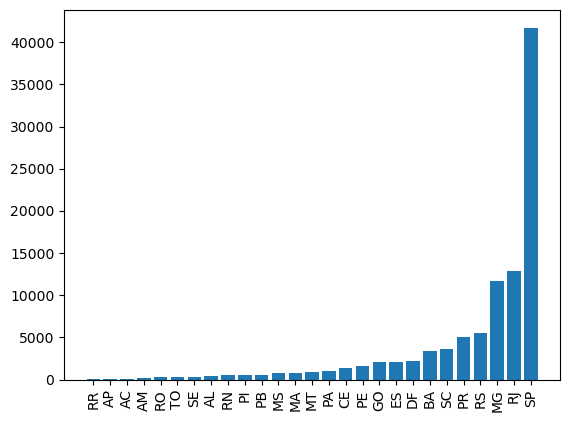

In [11]:
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

conn = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "",
    database = "test"
)
cursor = conn.cursor()
sql = """SELECT customer_state, COUNT(customer_id)
FROM customers GROUP BY customer_state
"""
cursor.execute(sql)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["state","customer count"])
df = df.sort_values(by = "customer count", ascending = True)
plt.bar(df["state"],df["customer count"])
plt.xticks(rotation = 90)
plt.show()

# 1. Calculate the number of orders per month in 2018.

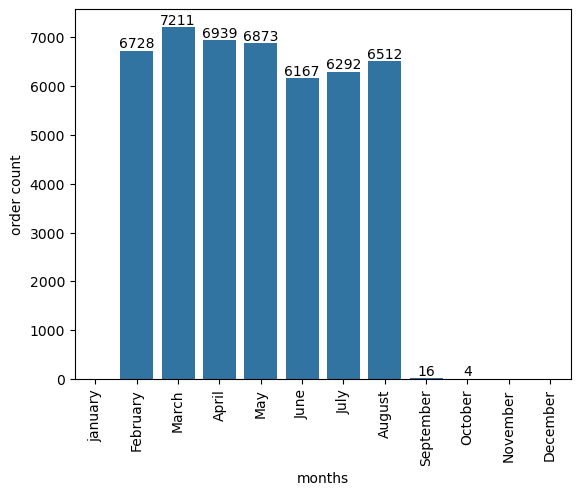

In [12]:
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

conn = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "",
    database = "test"
)
cursor = conn.cursor()
sql = """SELECT MONTHNAME(order_purchase_timestamp) months, COUNT(order_id) order_count
FROM orders WHERE YEAR(order_purchase_timestamp) = 2018
GROUP BY months
"""
cursor.execute(sql)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["months","order count"])
o = ["january","February","March","April","May","June","July","August","September","October","November","December"]
df = df.sort_values(by = "order count", ascending = True)
ax = sns.barplot(x = df["months"], y = df["order count"], data = df , order = o)
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])
plt.show()

In [9]:
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

conn = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "",
    database = "test"
)
cursor = conn.cursor()
sql = """SELECT MONTHNAME(order_purchase_timestamp) months, COUNT(order_id) order_count
FROM orders WHERE YEAR(order_purchase_timestamp) = 2018
GROUP BY months
"""
cursor.execute(sql)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["months","order count"],)
df

,months,order count
0,April,6939
1,August,6512
2,February,6728
3,January,7269
4,July,6292
5,June,6167
6,March,7211
7,May,6873
8,October,4
9,September,16


# 2. Find the average number of products per order, grouped by customer city.

In [ ]:
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

conn = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "",
    database = "test"
)
cursor = conn.cursor()
sql = """WITH count_per_order AS (
    SELECT orders.order_id, orders.customer_id, COUNT(order_items.order_id) AS oc 
FROM orders JOIN order_items 
ON orders.order_id = order_items.order_id
GROUP BY orders.order_id, orders.customer_id
)
SELECT customers.customer_city, round(AVG(count_per_order.oc),2) average_orders
FROM customers JOIN count_per_order 
ON customers.customer_id = count_per_order.customer_id
GROUP BY customers.customer_city;
"""
cursor.execute(sql)
data = cursor.fetchall()
df = pd.DataFrame(data)
df.head()

# 3. Calculate the percentage of total revenue contributed by each product category.

In [ ]:
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

conn = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "",
    database = "test"
)
cursor = conn.cursor()
sql = """SELECT upper(products.product_category) category, 
round((SUM(payments.payment_value)/(SELECT SUM(payment_value) FROM payments))*100,2) sales_percentage
FROM products JOIN order_items 
ON products.product_id = order_items.product_id
JOIN payments 
ON payments.order_id = order_items.order_id
GROUP BY category order by sales_percentage desc"""


cursor.execute(sql)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "percentage distribution"])
df.head()

# 4. Identify the correlation between product price and the number of times a product has been purchased.

In [ ]:
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

conn = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "",
    database = "test"
)
cursor = conn.cursor()
sql = """SELECT products.product_category, 
COUNT(order_items.product_id),
round(avg(order_items.price),2)
FROM products JOIN order_items
ON products.product_id = order_items.product_id
GROUP BY products.product_category"""

cursor.execute(sql)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "order_count","price"])

arr1 = df["order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print("the correlation is", a[0][-1])

# 5. Calculate the total revenue generated by each seller, and rank them by revenue.

In [ ]:
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

conn = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "",
    database = "test"
)
cursor = conn.cursor()
sql = """ SELECT *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """

cursor.execute(sql)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df = df.head()
sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()